# Gráficas Rendija Simple-Láser

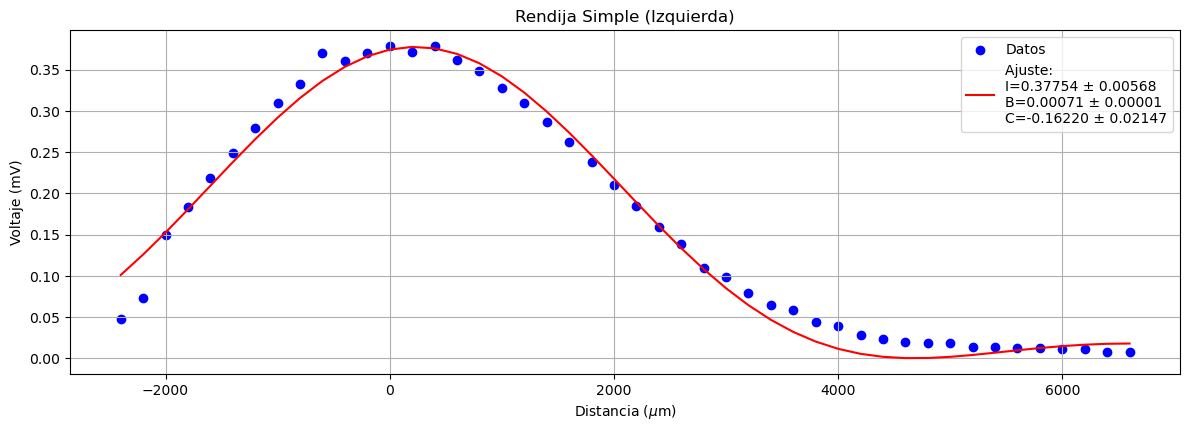

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Definición de la función sinc
def sinc(x, I, B, C):
    return I * (np.sin(B * x + C) / (B * x + C)) ** 2

# Leer los datos desde un archivo Excel
file_path = 'C:/Programación/Lab Intermedio/Doble rendija/Datos-Láser-una rendija_01.xlsx' # Cambia el nombre del archivo

data = pd.read_excel(file_path)

# Asume que las columnas del Excel tienen los nombres 'x' y 'y'
x_data = -data['d (micro)'].values + 6600  # Se suma 6600 para centrar la gráfica. El signo se usa ya que los datos están invertidos
y_data = data['V'].values  # Voltaje o intensidad de señal

# Ajuste de la función
popt, pcov = curve_fit(sinc, x_data, y_data, p0=[350, np.pi / 710, 10], maxfev=500000)

# Calcular incertidumbres de los parámetros
param_errors = np.sqrt(np.diag(pcov))

# Calcular valores ajustados y residuales
y_fit = sinc(x_data, *popt)
residuals = y_data - y_fit

# Configurar valores con 5 decimales para mostrar en la leyenda
I, B, C = popt
I_err, B_err, C_err = param_errors

# Graficar datos originales, ajuste y residuales
plt.figure(figsize=(12, 8))

# Gráfico 1: Datos y ajuste
plt.subplot(2, 1, 1)
plt.scatter(x_data, y_data, label='Datos', color='blue')
plt.plot(x_data, y_fit, label=(
    f'Ajuste: \n'
    f'I={I:.5f} ± {I_err:.5f}\n'
    f'B={B:.5f} ± {B_err:.5f}\n'
    f'C={C:.5f} ± {C_err:.5f}'
), color='red')
plt.xlabel('Distancia ($\mu$m)')
plt.ylabel('Voltaje (mV)')
plt.grid()
plt.legend()
plt.title('Rendija Simple (Izquierda)')

# Gráfico 2: Residuales


plt.tight_layout()
plt.show()



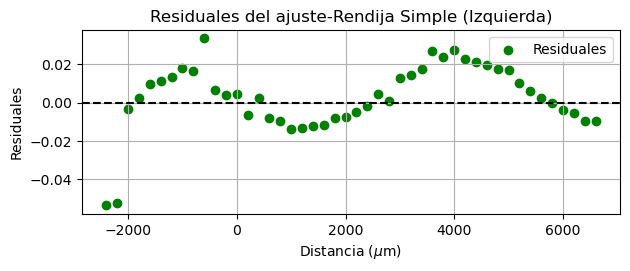

In [120]:
plt.subplot(2, 1, 2)
plt.scatter(x_data, residuals, label='Residuales', color='green')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Distancia ($\mu$m)')
plt.ylabel('Residuales')
plt.legend()
plt.grid()
plt.title('Residuales del ajuste-Rendija Simple (Izquierda)')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Rendija Simple (Derecha)')

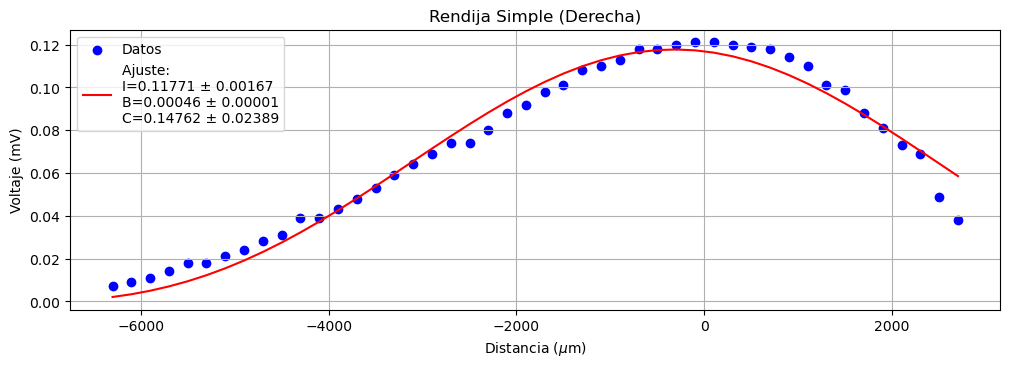

In [121]:
file_path = 'C:/Programación/Lab Intermedio/Doble rendija/Datos-Láser-una rendija_02.xlsx' # Cambia el nombre del archivo

data = pd.read_excel(file_path)

# Asume que las columnas del Excel tienen los nombres 'x' y 'y'
x_data = data['d (micro)'].values - 6300  # Se suma 6200 para centrar la gráfica.
y_data = data['V'].values  # Voltaje o intensidad de señal

# Ajuste de la función
popt, pcov = curve_fit(sinc, x_data, y_data, p0=[110, np.e / 800, 10], maxfev=500000)

# Calcular incertidumbres de los parámetros
param_errors = np.sqrt(np.diag(pcov))

# Calcular valores ajustados y residuales
y_fit = sinc(x_data, *popt)
residuals = y_data - y_fit

# Configurar valores con 5 decimales para mostrar en la leyenda
I, B, C = popt
I_err, B_err, C_err = param_errors

# Graficar datos originales, ajuste y residuales
plt.figure(figsize=(12, 8))

# Gráfico 1: Datos y ajuste
plt.subplot(2, 1, 1)
plt.scatter(x_data, y_data, label='Datos', color='blue')
plt.plot(x_data, y_fit, label=(
    f'Ajuste: \n'
    f'I={I:.5f} ± {I_err:.5f}\n'
    f'B={B:.5f} ± {B_err:.5f}\n'
    f'C={C:.5f} ± {C_err:.5f}'
), color='red')
plt.xlabel('Distancia ($\mu$m)')
plt.ylabel('Voltaje (mV)')
plt.grid()
plt.legend()
plt.title('Rendija Simple (Derecha)')

# Gráfico 2: Residuales


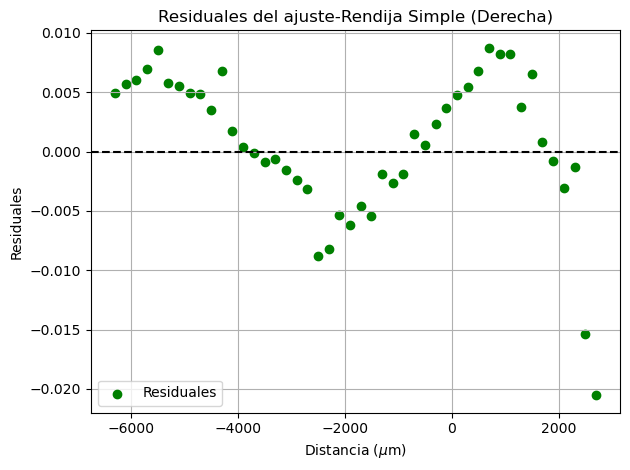

In [122]:
plt.subplot(1, 1, 1)
plt.scatter(x_data, residuals, label='Residuales', color='green')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Distancia ($\mu$m)')
plt.ylabel('Residuales')
plt.legend()
plt.grid()
plt.title('Residuales del ajuste-Rendija Simple (Derecha)')

plt.tight_layout()
plt.show()